# Predicting the Heart Disease Using Machine Learning

This notebook looks into various python-based machine learning and data science libraries in an attempt to build 
various machine learning models capable of predicting whether or not someone has heart disease based on their medical attributes


Were going to use the following steps:
    1. Problem Definition
    2. Data
    3. Evaluation
    4. Features
    5. Modelling
    6. Experimentation

## Problem Statement 

If we are given the values of the clinical data of a person can we predict whether the person has heart disease or not?

## Data
The data came from the Cleaveland Data Ohio UCI website

## Evaluation 

We need to have an accuracy of around 95% in our proof of concept 

## Features
**Create the data dictionary**



* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
* thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing the tools 

Use pandas, numpy and matplotlib for data analysis



In [1]:
# Import all tools we need

#Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

#Import the models we require from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Import model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve


C:\Users\Public\miniconda\heart-disease-tracker-project\env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Getting Our Data

In [2]:
df=pd.read_csv("heart-disease.csv")
df.head(), df.shape

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  target  
 0   0     1       1  
 1   0     2       1  
 2   0     2       1  
 3   0     2       1  
 4   0     2       1  ,
 (303, 14))

## Exploratory Data Analysis:
1.What questions are we trying to solve?
2. What kind of data do we have and how do we treat different data types?
3. What's missing from the data and how to deal with it?
4. What are the outliers and why should you care about them?
5. How can you add change or remove features to get more out of your data?


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

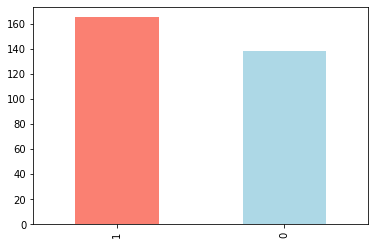

In [5]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#Check for any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
#compare the target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


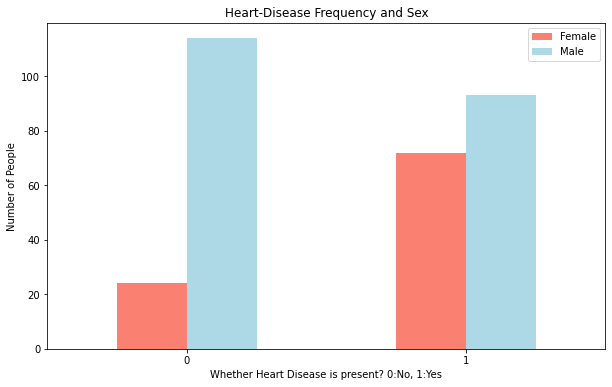

In [11]:
#Create a plot of the crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Heart-Disease Frequency and Sex")
plt.xlabel("Whether Heart Disease is present? 0:No, 1:Yes")
plt.ylabel("Number of People")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [12]:
pd.crosstab(df.age, df.target).head()

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2


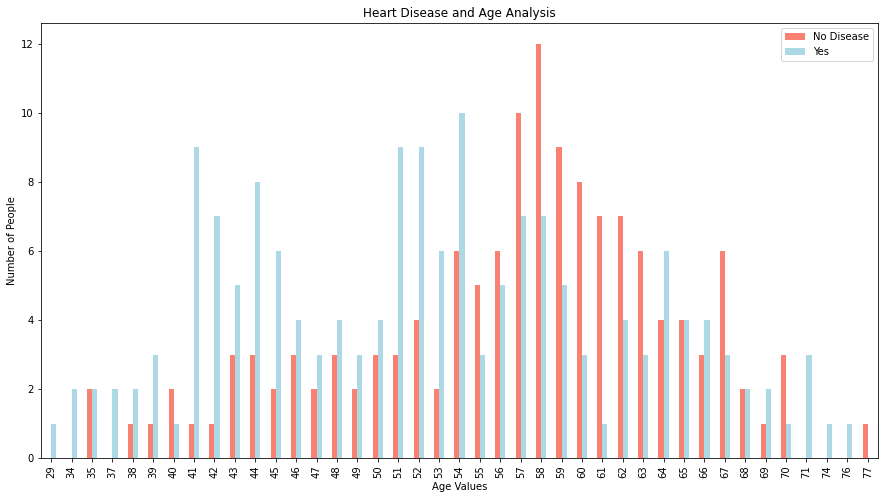

In [13]:
pd.crosstab(df.age, df.target).plot(kind="bar", figsize=(15,8), color=["salmon", "lightblue"])
plt.title("Heart Disease and Age Analysis")
plt.xlabel("Age Values")
plt.ylabel("Number of People")
plt.legend(["No Disease", "Yes"])

In [14]:
# Age VS Max Heart Rate for Heart Diseaseplt.s
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

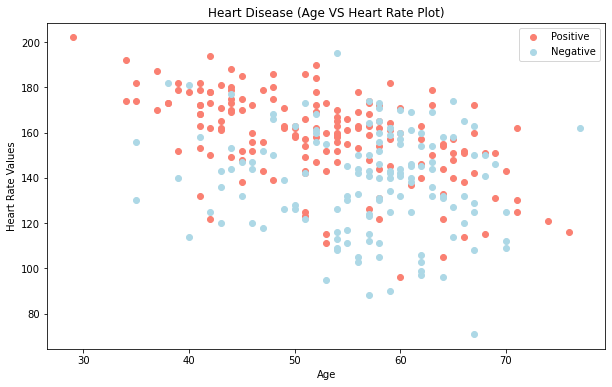

In [15]:
plt.figure(figsize=(10,6));
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="salmon");
plt.title("Heart Disease (Age VS Heart Rate Plot)")
plt.xlabel("Age")
plt.ylabel("Heart Rate Values");

## The inference we can make from this plot is the fact that at the younger age the maximum heart rate values are higher.


plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="lightblue");
plt.legend(["Positive", "Negative"]);

In [16]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

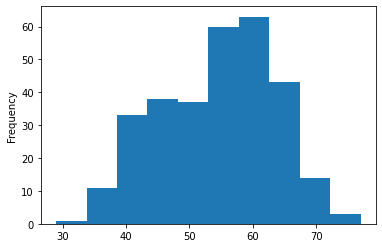

In [17]:
df.age.plot.hist();

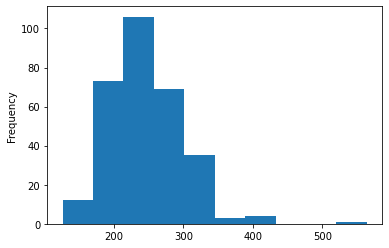

In [18]:
df.chol.plot.hist(); ##This output gives us an outlier value as we can see.

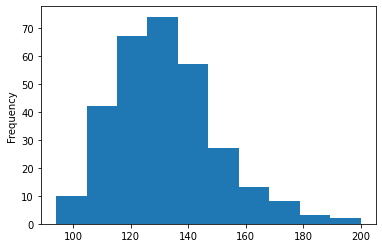

In [19]:
df.trestbps.plot.hist(); ## No specific outlier values

#### Heart Disease Frequency Per Chest Pain Type
*cp - chest pain:
    1. type 0: Typical angina: chest pain related decrease blood supply to the heart 
    2. type 1: Atypical angina: chest pain not related to heart 
    3. type 2: Non-anginal pain: typically esophageal spasms (non heart related)
    4.type 3: Asymptomatic: chest pain not showing signs of disease

In [20]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


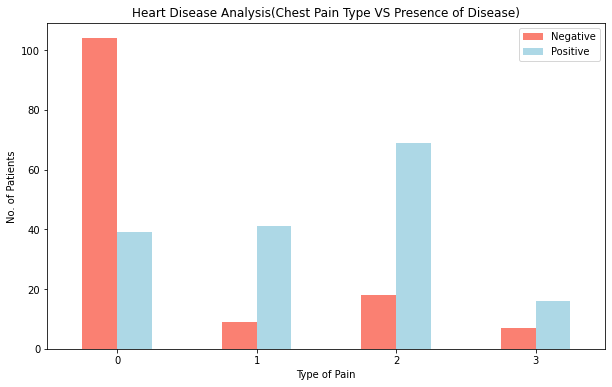

In [21]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Heart Disease Analysis(Chest Pain Type VS Presence of Disease)")
plt.xlabel("Type of Pain")
plt.ylabel("No. of Patients")
plt.legend(["Negative", "Positive"]);
plt.xticks(rotation=0);

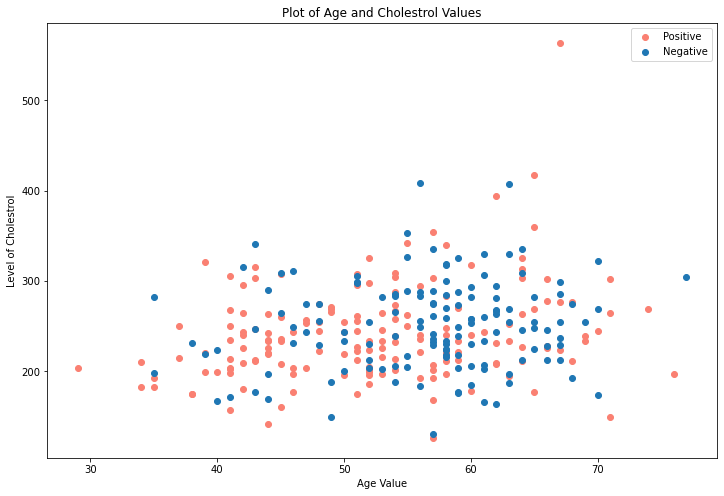

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(df.age[df.target==1], df.chol[df.target==1], c="salmon");
plt.title("Plot of Age and Cholestrol Values");
plt.xlabel("Age Value");
plt.ylabel("Level of Cholestrol");


plt.scatter(df.age[df.target==0], df.chol[df.target==0]);
plt.legend(["Positive", "Negative"]);

In [23]:
## We make a correlation matrix 

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


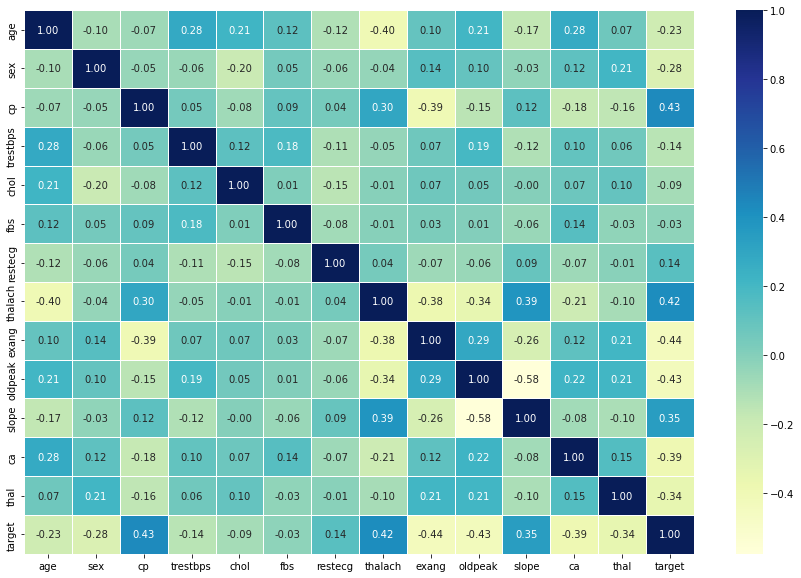

In [24]:
## making our correlation matrix a little better

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu");

## 5. Evaluation

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
#Define the dependent and independent variables
X=df.drop("target", axis=1)
y=df["target"]

#Splitting our data into train and test split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

* The 3 models that we use are:
    1. Logistic Regression
    2. K-Nearest Neighbors Classifier
    3. Random Forest Classifier
    

* We setup a dictionary titled models with the models which we want to implement.

In [31]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [32]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\Public\miniconda\heart-disease-tracker-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

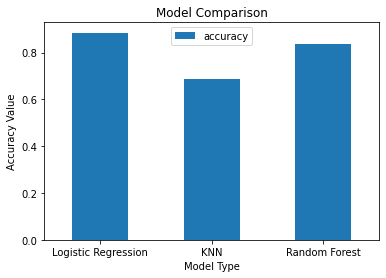

In [38]:
model_compare=pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.title("Model Comparison");
plt.xlabel("Model Type");
plt.ylabel("Accuracy Value");
plt.xticks(rotation=0);

* Lets look at the following:
    * Hyperparameter tuning
    * Feature importance
    * Confusion Matrix
    * Precision
    * Recall
    * F1 Score
    * Classification Report
    * ROC Curve
    * Area Under the Curve
  
### Hyperparameter tuning

In [40]:
# Tuning the KNN Model

train_scores=[]
test_scores=[]

# Creating the different values for the n_neighbours classifier

neighbors= range(1,21)

# Creating the model 

knn=KNeighborsClassifier();

# Loop through the different N Neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fitting the algorithm
    knn.fit(X_train, y_train)
    
    # Updating the score list
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
train_scores, test_scores




([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

The maximum test score in the KNN Model attained is 75.41%


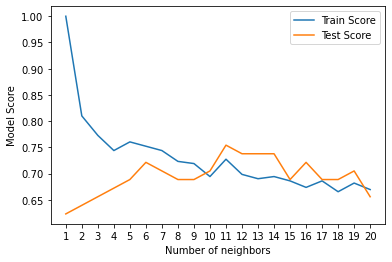

In [42]:
# We plot our train and test scores

plt.plot(neighbors, train_scores, label="Train Score");
plt.plot(neighbors, test_scores, label="Test Score");
plt.xlabel("Number of neighbors");
plt.ylabel("Model Score");
plt.legend()
plt.xticks(np.arange(1,21,1));

print(f"The maximum test score in the KNN Model attained is {max(test_scores)*100:.2f}%")

## Hyperparameter Tuning with Randomized Search CV

We're going to tune:
* Logistic Regression
* RandomForestClassifier

In [53]:
## Creating a hyperparameter grid for the logistic regression model 

log_reg_grid ={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]
              }
## Creating a hyperparameter grid for the randomforestclassifier model 

rf_grid={"n_estimators" :np.arange(10, 1000, 50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

log_reg_grid, rf_grid

({'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
         4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
         2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
         1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
         5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
  'solver': ['liblinear']},
 {'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
         660, 710, 760, 810, 860, 910, 960]),
  'max_depth': [None, 3, 5, 10],
  'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
  'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])})

In [45]:
np.random.seed(42)

rs_log_reg=RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [46]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [47]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned logistic regression let's do the same for the random forest classifier

In [54]:
#Setup random seed
np.random.seed(42)

#Setup random hyperparameter search for Random Forest Classifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        verbose=True,
                        n_iter=20)

rs_rf.fit(X_test, y_test);


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [56]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 5}

In [57]:
rs_rf.score(X_test, y_test)

0.9016393442622951

We notice that our Logistic Regression model is giving a decently good performance so we move forward with that. We will implement GridSearchCV on that. 

In [59]:
#Different parameters for our Logistic Regression model

log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]
             }

gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [60]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [61]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

## Evaluation of our model beyond accuracy
* ROC Curve and AUC values
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 Score


In [62]:
y_preds=gs_log_reg.predict(X_test)

In [64]:
y_preds, np.array(y_test)

(array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64))

C:\Users\Public\miniconda\heart-disease-tracker-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


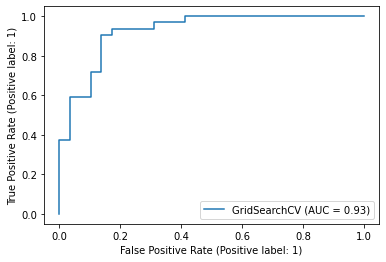

In [65]:
# Importing the ROC Curve funtion. 
from sklearn.metrics import plot_roc_curve

#Plotting the ROC CUrve and finding the AUC value

plot_roc_curve(gs_log_reg, X_test, y_test)

In [66]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


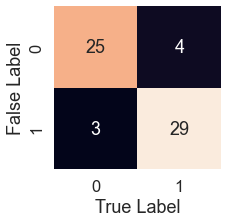

In [67]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap
    
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False);
    plt.xlabel("True Label")
    plt.ylabel("False Label")
plot_conf_mat(y_test, y_preds)
   
    

Now that we've got the required ROC Curve, AUC Metric, and confusion matrix let us get a classification report as well as cross-validated precision, recall, and f1 score

In [69]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate Evaluation Metrics Using cross validation

We're going to calculate the precision, recall, and f1 score of our model using cross validation and to do so we'll be using `cross_val_score()` function

In [71]:
#Find our best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [72]:
clf=LogisticRegression(C=0.20433597178569418, solver="liblinear")

In [81]:
#Cross-Validated Accuracy
cv_acc=cross_val_score(clf, X,y, cv=5, scoring="accuracy")
cv_acc,cv_acc.mean()

(array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ]),
 0.8446994535519124)

In [82]:
#Cross-Validated Precision
cv_precision=cross_val_score(clf, X,y, scoring="precision")
cv_precision, cv_precision.mean()

(array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ]),
 0.8207936507936507)

In [83]:
#Cross-Validated Recall
cv_recall=cross_val_score(clf, X,y, scoring="recall")
cv_recall, cv_recall.mean()

(array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788]),
 0.9212121212121213)

In [85]:
#Cross-Validated F1-Score
cv_f1score=cross_val_score(clf,X,y, scoring="f1")
cv_f1score, cv_f1score.mean()

(array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055]),
 0.8673007976269721)

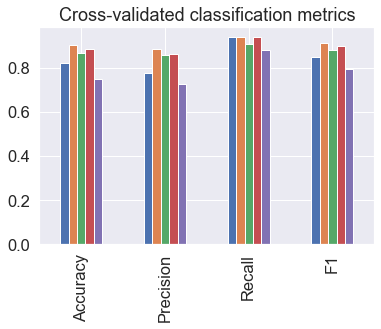

In [91]:
#Visualize our cross validated metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1score})

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);